In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Chuẩn bị dữ liệu

In [2]:
# Đọc tập tin dữ liệu
df = pd.read_csv('athletes.csv', index_col=0)

In [3]:
df.head()

,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,total,year,age
0,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,0,1969,47
1,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,0,1986,30
2,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,1,1992,24
3,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,0,1991,25
4,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,0,1990,26


In [4]:
# Tạo danh sách 10 quốc gia có số vận động viên thi đấu nhiều nhất
df_top10 = df.groupby('nationality', as_index=False).size().sort_values(by='size', ascending=False).head(10)
df_top10

,nationality,size
198,USA,567
26,BRA,485
72,GER,441
10,AUS,431
64,FRA,410
38,CHN,404
68,GBR,374
97,JPN,346
33,CAN,321
59,ESP,313


## Trực quan hóa dữ liệu với matplotlib

In [5]:
import matplotlib.pyplot as plt

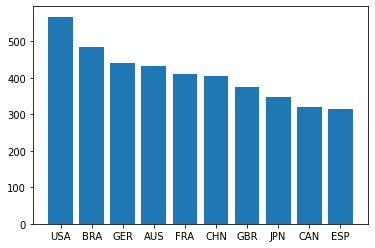

In [6]:
# Vẽ Bar plot thể hiện số vận động viên tham gia thi đấu của top 10 quốc gia
plt.bar(df_top10['nationality'], df_top10['size'])
plt.show()

### Hiệu chỉnh biểu đồ Bar bằng cách dùng module pyplot của matplotlib (Scripting Layer)

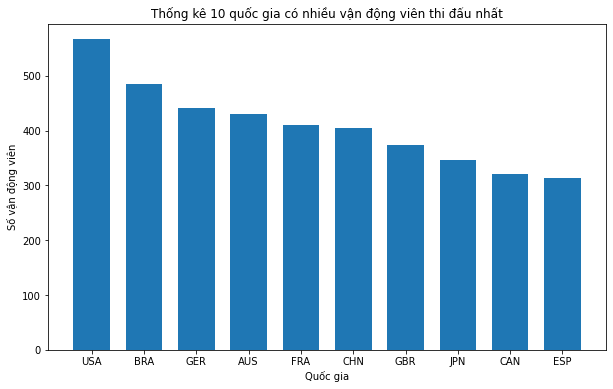

In [7]:
plt.figure(figsize=(10,6)) # định kích thước biểu đồ
plt.bar(df_top10['nationality'], df_top10['size'], width=0.7) # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.show()

### Hiệu chỉnh biểu đồ Bar bằng các biến đối tượng của matplotlib (Artist Layer)

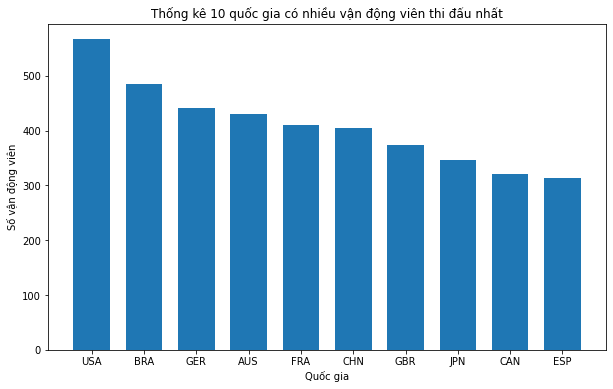

In [8]:
fig, ax = plt.subplots(figsize=(10,6)) # định kích thước biểu đồ, trả về figure và axes
ax.bar(df_top10['nationality'], df_top10['size'], width=0.7) # vẽ bar plot
ax.set_title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
ax.set_xlabel('Quốc gia') # tiêu đề trên trục x
ax.set_ylabel('Số vận động viên') # tiêu đề trên trục y
plt.show()

### Thay đổi giá trị bắt đầu của trục y trên biểu đồ và nhận xét 

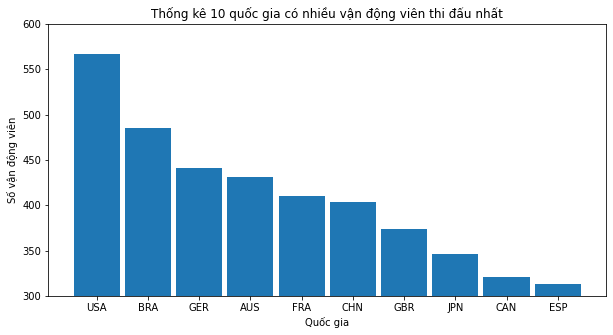

In [9]:
plt.figure(figsize=(10,5)) # định kích thước biểu đồ
plt.bar(df_top10['nationality'], df_top10['size'], width=0.9) # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.ylim(300,600) # giới hạn thang đo trục y từ 300 đến 600
plt.show()

### Lưu biểu đồ

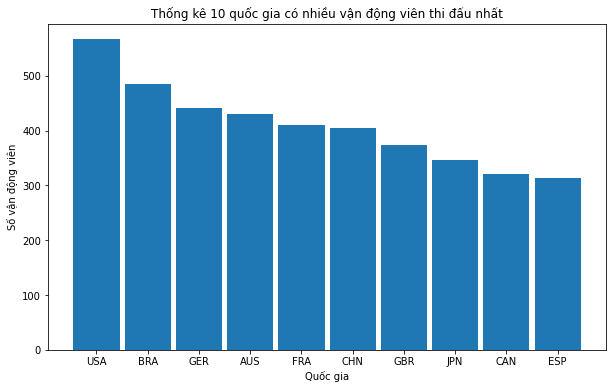

In [10]:
plt.figure(figsize=(10,6)) # định kích thước biểu đồ
plt.bar(df_top10['nationality'], df_top10['size'], width=0.9) # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.savefig('barchart.jpg')

### Hiển thị lại biểu đồ đã lưu

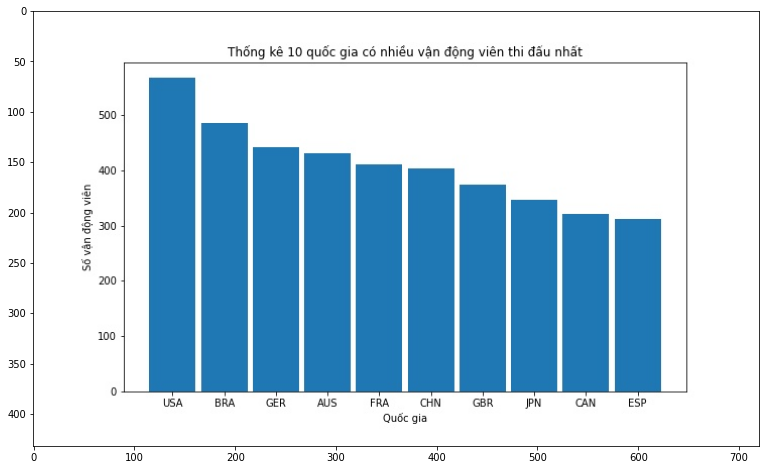

In [11]:
import matplotlib.image as mpimg

img = mpimg.imread('barchart.jpg')
plt.figure(figsize=(13,10))
plt.imshow(img)
plt.show()

## Trực quan hóa dữ liệu với seaborn

In [12]:
import seaborn as sns

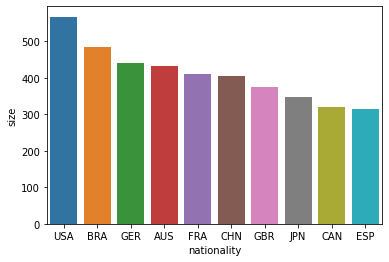

In [13]:
# Vẽ Bar plot
sns.barplot(data=df_top10, x='nationality', y='size')
plt.show()

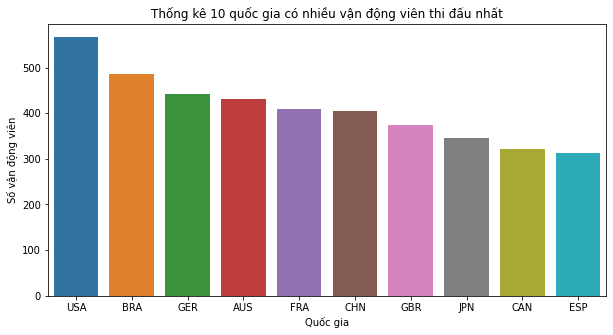

In [14]:
# Hiệu chỉnh biểu đồ
plt.figure(figsize=(10,5)) # định kích thước biểu đồ
sns.barplot(data=df_top10, x='nationality', y='size') # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.show()

### Sử dụng các style trong seaborn

white


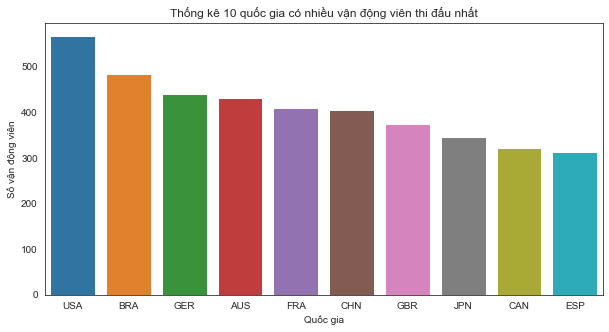

dark


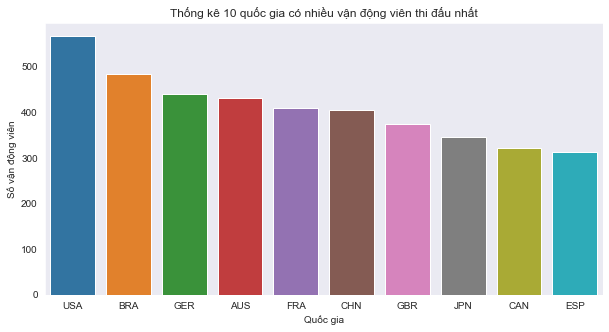

whitegrid


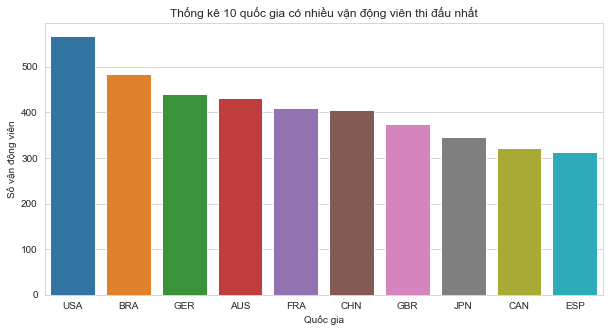

darkgrid


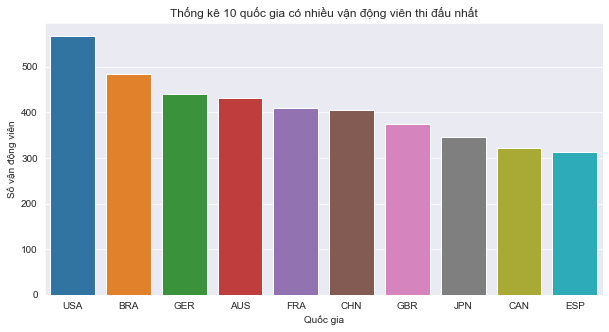

ticks


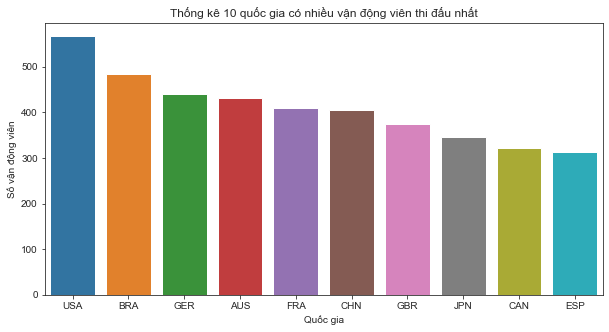

In [15]:
# seaborn style: 'white','dark','whitegrid','darkgrid','ticks'
sns_style = ['white','dark','whitegrid','darkgrid','ticks']
for st in sns_style:
    print(st)
    sns.set_style(st)
    plt.figure(figsize=(10,5)) # định kích thước biểu đồ
    sns.barplot(data=df_top10, x='nationality', y='size') # vẽ bar plot
    plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
    plt.xlabel('Quốc gia') # tiêu đề trên trục x
    plt.ylabel('Số vận động viên') # tiêu đề trên trục y
    plt.show()

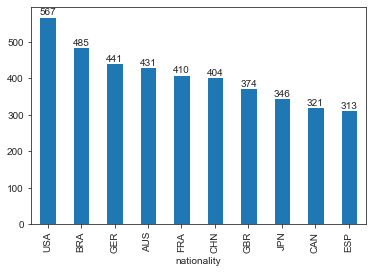

In [16]:
ax = df_top10.plot(kind='bar', legend = False, x = 'nationality') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

### Sử dụng color palete

12 

deep


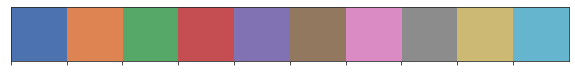

deep6


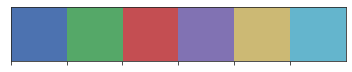

muted


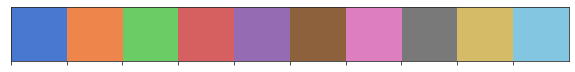

muted6


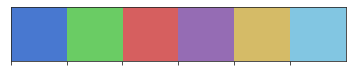

pastel


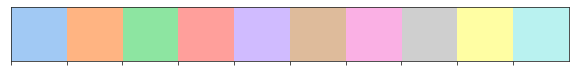

pastel6


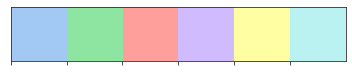

bright


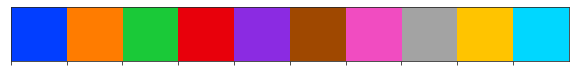

bright6


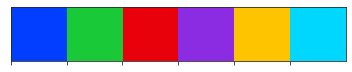

dark


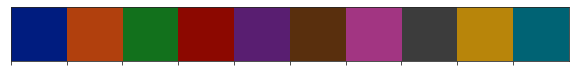

dark6


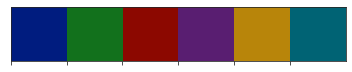

colorblind


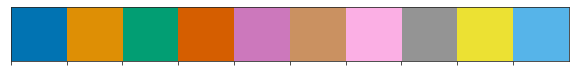

colorblind6


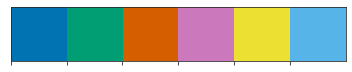

In [17]:
# in các bảng màu trong seaborn
print(len(sns.palettes.SEABORN_PALETTES),'\n')
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    print(p)
    sns.palplot(sns.color_palette())
    plt.show()

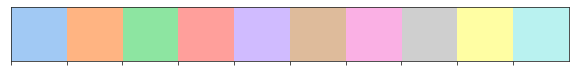

In [18]:
# Circular Colors – Màu theo vòng
sns.palplot(sns.color_palette('pastel', 10))
plt.show()

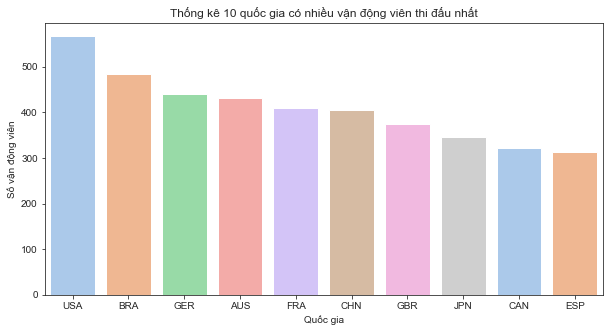

In [19]:
p = sns.color_palette('pastel', 8)

plt.figure(figsize=(10,5)) # định kích thước biểu đồ
sns.barplot(data=df_top10, x='nationality', y='size', palette=p) # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.show()

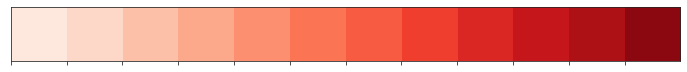

In [20]:
# Sequential Colors - Màu tuần tự
sns.palplot(sns.color_palette('Reds', 12))

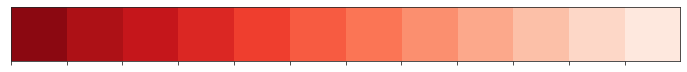

In [21]:
p = sns.color_palette('Reds', 12)
p.reverse()
sns.palplot(p)

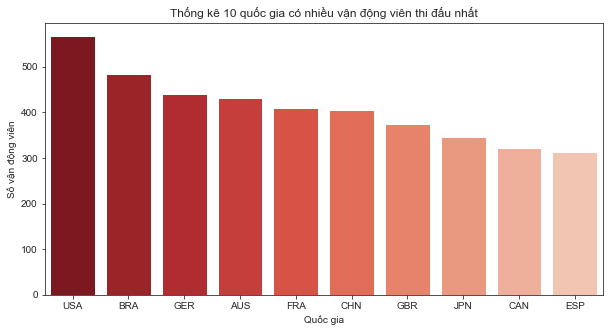

In [22]:
p = sns.color_palette('Reds', 12)
p.reverse()

plt.figure(figsize=(10,5)) # định kích thước biểu đồ
sns.barplot(data=df_top10, x='nationality', y='size', palette=p) # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.show()

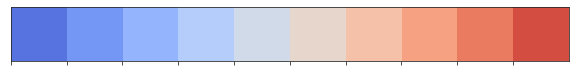

In [23]:
# Diverging colors – Màu phân kỳ
p = sns.color_palette('coolwarm', 10)
sns.palplot(p)

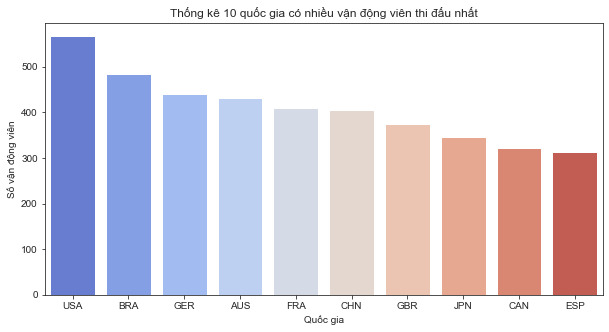

In [24]:
p = sns.color_palette('coolwarm', 10)

plt.figure(figsize=(10,5)) # định kích thước biểu đồ
sns.barplot(data=df_top10, x='nationality', y='size', palette=p) # vẽ bar plot
plt.title('Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất') # tiêu đề biểu đồ
plt.xlabel('Quốc gia') # tiêu đề trên trục x
plt.ylabel('Số vận động viên') # tiêu đề trên trục y
plt.show()

## Trực quan hóa dữ liệu với plotly

### Vẽ Bar plot bằng cách dùng plotly express

In [25]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig = px.bar(df_top10, x='nationality', y='size')
fig.show()

### Hiệu chỉnh biểu đồ Bar bằng cách dùng plotly express

In [ ]:
fig = px.bar(df_top10, x='nationality', y='size', 
            title='Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất',
            labels={'nationality':'Quốc gia', 'size':'Số vận động viên'},
            width=700, height=500,
            template="simple_white",
            text_auto=True)
fig.show()

### Vẽ Bar plot bằng cách dùng plotly graph object

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top10['nationality'], y=df_top10['size']))
fig.show()

### Hiệu chỉnh biểu đồ Bar bằng cách dùng plotly graph object

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_top10['nationality'], y=df_top10['size'],
                            text=df_top10['size']))

fig.update_layout({'title': 'Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất',
                 'xaxis_title': 'Quốc gia',
                 'yaxis_title': 'Số vận động viên',
                 'template':'simple_white'})

fig.show()

In [ ]:
print(fig)

In [ ]:
figure_config = dict({
    'data': [{'text': df_top10['size'],
              'textposition': 'outside',
              'type': 'bar',
              'x': df_top10['nationality'],
              'y': df_top10['size']}],
    'layout': {
               'template': 'ggplot2',
               'title': {'text': 'Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất'},
               
               'xaxis': {'title': {'text': 'Quốc gia'}},
               'yaxis': {'title': {'text': 'Số vận động viên'}}}
})
fig = go.Figure(figure_config)
fig.show()

### Đặt màu cho biểu đồ khi vẽ bằng plotly express

In [ ]:
fig = px.bar(df_top10, x='nationality', y='size', 
            title='Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất',
            labels={'nationality':'Quốc gia', 'size':'Số vận động viên'},
            width=850, height=500,
            color='nationality', color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(showlegend=False)

fig.show()

### Đặt màu cho biểu đồ khi vẽ bằng plotly graph object

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_top10['nationality'], y=df_top10['size'], 
                     marker = {'color': px.colors.qualitative.G10}))

fig.update_layout({'title': 'Thống kê 10 quốc gia có nhiều vận động viên thi đấu nhất',
                 'xaxis_title': 'Quốc gia',
                 'yaxis_title': 'Số vận động viên'})

fig.show()

In [ ]:
fig = px.colors.qualitative.swatches()
fig.show()

In [ ]:
fig = px.colors.sequential.swatches()
fig.show()

In [ ]:
fig = px.colors.diverging.swatches()
fig.show()